In [1]:
import pandas as pd
import CococoNet_reader 
import pickle 
import tqdm
import Name_resolver
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
Name_resolver.species_name_resolver('Oryza sativa japonica')

'rice_jp'

In [3]:
species_with_nets = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/Species_name_resolver.csv')
species_with_nets = species_with_nets[:18]
# # species_with_nets = species_with_nets.drop(index = [13,14])
# # species_with_nets.loc[0,'Taxa ID'] = 39947 
taxa_to_keep = species_with_nets['Taxa ID'].to_list()
taxa_to_keep

[4530,
 39947,
 3750,
 4558,
 4577,
 29760,
 3711,
 3847,
 3880,
 4097,
 4113,
 4081,
 3702,
 3818,
 4565,
 3659,
 1753,
 15368]

In [4]:
species_with_nets_to_run = species_with_nets.loc[~species_with_nets['Common Name'].isin(['rice','wheat','rapeseed'])]
species_with_nets_to_run

,Species,Taxa ID,Common Name
1,Oryza sativa japonica,39947,rice_jp
2,Malus domestica,3750,apple
3,Sorghum bicolor,4558,sorghum
4,Zea mays,4577,maize
5,Vitis vinifera,29760,grape
6,Brassica rapa,3711,mustard
7,Glycine max,3847,soybean
8,Medicago truncatula,3880,medicago
9,Nicotiana tabacum,4097,tobacco
10,Solanum tuberosum,4113,potato


In [5]:
#species_with_nets_to_run.to_csv('/data/passala/Generated_Tables/Reference_tables/species_for_running_cross_ortho_analysis.csv',index = False)

In [6]:
og_groups = pd.read_csv('/data/passala/OrthoDB_data/NCBI_data/eukaryota_level_stuff/og_2_Genes_with_network_id.csv')
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,0at2759,15368_0:006377,15368,2759,15368_0:006377,psbD
1,0at2759,29760_0:006494,29760,2759,29760_0:006494,psbD
2,0at2759,3659_0:004e0f,3659,2759,3659_0:004e0f,psbD
3,0at2759,3702_0:006ad0,3702,2759,3702_0:006ad0,psbD
4,0at2759,3711_0:005e40,3711,2759,3711_0:005e40,LOC117126101
...,...,...,...,...,...,...
505254,9at2759,4097_0:00f00f,4097,2759,4097_0:00f00f,petD
505255,9at2759,4113_0:00079d,4113,2759,4113_0:00079d,LOC107063147
505256,9at2759,4113_0:006ebb,4113,2759,4113_0:006ebb,petD
505257,9at2759,4558_0:006df8,4558,2759,4558_0:006df8,petD


In [9]:
all_group_annotations = pd.DataFrame(columns = ['Avg FC','Avg EGAD', 'Species Present'], index = og_groups['Orthogroup'].unique())
all_group_annotations

,Avg FC,Avg EGAD,Species Present
0at2759,NaN,NaN,NaN
1000005at2759,NaN,NaN,NaN
1000010at2759,NaN,NaN,NaN
1000136at2759,NaN,NaN,NaN
1000208at2759,NaN,NaN,NaN
...,...,...,...
999854at2759,NaN,NaN,NaN
999855at2759,NaN,NaN,NaN
999925at2759,NaN,NaN,NaN
999984at2759,NaN,NaN,NaN


In [10]:

# for group in tqdm.tqdm(all_group_annotations.index):
#     genes = og_groups.loc[og_groups['Orthogroup'] == group]
#     num_species = len(genes['Species'].unique())
#     all_group_annotations.loc[group,'Species Present'] = num_species

# all_group_annotations


100%|██████████| 43353/43353 [15:07<00:00, 47.79it/s]


,Avg FC,Avg EGAD,Species Present
0at2759,NaN,NaN,12
1000005at2759,NaN,NaN,9
1000010at2759,NaN,NaN,1
1000136at2759,NaN,NaN,2
1000208at2759,NaN,NaN,1
...,...,...,...
999854at2759,NaN,NaN,1
999855at2759,NaN,NaN,1
999925at2759,NaN,NaN,1
999984at2759,NaN,NaN,1


In [11]:
# all_group_annotations.to_csv('/data/passala/Generated_Tables/Temp_junk/annotated_eukaryote_groups_with_number_species.csv')

In [ ]:
all_group_annotations = pd.read_csv('/data/passala/Generated_Tables/Temp_junk/annotated_eukaryote_groups_with_number_species.csv', index_col= 0)

In [31]:
egad_scores = pd.read_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/Ortho_cross_all_tables/egad_scores_orthogroups.csv',index_col= 0)

In [32]:
egad_scores

,rice_jp AUC,rice_jp P_Value,apple AUC,apple P_Value,sorghum AUC,sorghum P_Value,maize AUC,maize P_Value,grape AUC,grape P_Value,...,tomato AUC,tomato P_Value,arabidopsis AUC,arabidopsis P_Value,peanut AUC,peanut P_Value,cucumber AUC,cucumber P_Value,brome AUC,brome P_Value
10009at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.401113,0.346227,NaN,NaN,0.989036,0.001673,NaN,NaN,NaN,NaN
10051at3193,NaN,NaN,NaN,NaN,0.824484,0.097168,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10092at3193,NaN,NaN,0.972724,0.029325,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN
10147at3193,NaN,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.966198,0.031113,0.573785,0.123953,NaN,NaN,NaN,NaN
1018at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9877at3193,NaN,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.745225,0.163335,0.914328,0.048738,0.952515,0.001031,NaN,NaN,NaN,NaN
9919at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.946469,0.037065,NaN,NaN,NaN,NaN
9942at3193,0.643618,0.192945,0.469626,0.436319,0.500000,0.500000,0.79142,0.082094,0.75488,0.002001,...,0.500000,0.500000,0.400784,0.345742,0.270053,0.178851,NaN,NaN,0.327220,0.14996


In [33]:
def get_fc_table(species_1,species_2):
    """Takes two species common names in any order and returns the N to M table for that pair with species_1 as column 1 and species_2 as column 2 

    Args:
        species_1 (str): species common name
        species_2 (str): species common name

    Returns:
        str: All N-M gene pairs
    """
    import pandas as pd
    import os 

    list_of_files = os.listdir('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/N_M_FC_tables')
    trimmed_to_species_1 = list(filter(lambda x:species_1 in x, list_of_files))
    final_file = list(filter(lambda x: species_2 in x, trimmed_to_species_1))[0]
    formatted_final_file = f"/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/N_M_FC_tables/{final_file}"
    read_in_file = pd.read_csv(formatted_final_file, index_col= 0)

    return read_in_file

In [34]:
current_table = get_fc_table('maize','grape')

In [35]:
species_with_nets

,Species,Taxa ID,Common Name
0,Oryza sativa,4530,rice
1,Oryza sativa japonica,39947,rice_jp
2,Malus domestica,3750,apple
3,Sorghum bicolor,4558,sorghum
4,Zea mays,4577,maize
5,Vitis vinifera,29760,grape
6,Brassica rapa,3711,mustard
7,Glycine max,3847,soybean
8,Medicago truncatula,3880,medicago
9,Nicotiana tabacum,4097,tobacco


In [36]:
current_species_taxa = species_with_nets_to_run.loc[species_with_nets_to_run['Common Name'] == 'grape']['Taxa ID'].item()

In [37]:
current_og_groups = og_groups.loc[og_groups['Species']==current_species_taxa]
current_og_groups = current_og_groups.loc[current_og_groups['Orthogroup'].isin(egad_scores.index)]

In [38]:
current_og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
6,10009at3193,29760_0:005643,29760,3193,29760_0:005643,LOC104882588
7,10009at3193,29760_0:005709,29760,3193,29760_0:005709,LOC100267702
78,10092at3193,29760_0:001162,29760,3193,29760_0:001162,LOC100244127
123,10147at3193,29760_0:004e38,29760,3193,29760_0:004e38,LOC100266467
213,10228at3193,29760_0:005012,29760,3193,29760_0:005012,LOC100254135
...,...,...,...,...,...,...
502784,9919at3193,29760_0:002a0e,29760,3193,29760_0:002a0e,LOC100241131
502814,9942at3193,29760_0:000cf8,29760,3193,29760_0:000cf8,LOC100241864
502815,9942at3193,29760_0:00180e,29760,3193,29760_0:00180e,LOC100261021
502816,9942at3193,29760_0:006063,29760,3193,29760_0:006063,LOC100855403


In [39]:
current_table

,maize,grape,Group Number,Species 1 Score,Species 2 Score,Total Score
0,Zm00001d027886,LOC100244127,1,0.969069,0.947402,0.958236
1,Zm00001d016581,LOC100241432,5,0.957155,0.924335,0.940745
2,Zm00001d050929,LOC100255596,7,0.931933,0.913649,0.922791
3,Zm00001d012815,LOC100256288,8,0.975236,0.924162,0.949699
4,Zm00001d034914,LOC100256288,8,0.923722,0.940363,0.932043
...,...,...,...,...,...,...
24937,Zm00001d038200,LOC100261021,9972,0.871372,0.952529,0.911951
24938,Zm00001d010251,LOC100855403,9972,0.574060,0.632821,0.603441
24939,Zm00001d010251,LOC100241864,9972,0.734690,0.659291,0.696990
24940,Zm00001d010251,LOC100256637,9972,0.593487,0.690708,0.642098


In [40]:
merged_groups = current_og_groups.merge(how = 'left', left_on = "Symbol",right_on='grape', right = current_table[['maize','grape','Total Score']]  )

In [41]:
merged_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol,maize,grape,Total Score
0,10009at3193,29760_0:005643,29760,3193,29760_0:005643,LOC104882588,NaN,NaN,NaN
1,10009at3193,29760_0:005709,29760,3193,29760_0:005709,LOC100267702,NaN,NaN,NaN
2,10092at3193,29760_0:001162,29760,3193,29760_0:001162,LOC100244127,Zm00001d027886,LOC100244127,0.958236
3,10147at3193,29760_0:004e38,29760,3193,29760_0:004e38,LOC100266467,NaN,NaN,NaN
4,10228at3193,29760_0:005012,29760,3193,29760_0:005012,LOC100254135,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
35173,9942at3193,29760_0:006063,29760,3193,29760_0:006063,LOC100855403,Zm00001d038200,LOC100855403,0.617242
35174,9942at3193,29760_0:006063,29760,3193,29760_0:006063,LOC100855403,Zm00001d010251,LOC100855403,0.603441
35175,9942at3193,29760_0:006214,29760,3193,29760_0:006214,LOC100256637,Zm00001d005498,LOC100256637,0.617242
35176,9942at3193,29760_0:006214,29760,3193,29760_0:006214,LOC100256637,Zm00001d038200,LOC100256637,0.656273


In [42]:
merged_groups.groupby('Orthogroup').mean().dropna()

/tmp/ipykernel_197949/735756621.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_groups.groupby('Orthogroup').mean().dropna()


,Species,Ortholevel,Total Score
Orthogroup,,,
10092at3193,29760.0,3193.0,0.958236
10488at3193,29760.0,3193.0,0.940745
10582at3193,29760.0,3193.0,0.922791
10648at3193,29760.0,3193.0,0.940871
10757at3193,29760.0,3193.0,0.966079
...,...,...,...
9609at3193,29760.0,3193.0,0.607611
9789at3193,29760.0,3193.0,0.803358
9836at3193,29760.0,3193.0,0.823845


/tmp/ipykernel_197949/1654839291.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.histplot(merged_groups.groupby('Orthogroup').mean().dropna()['Total Score'])


<AxesSubplot:xlabel='Total Score', ylabel='Count'>

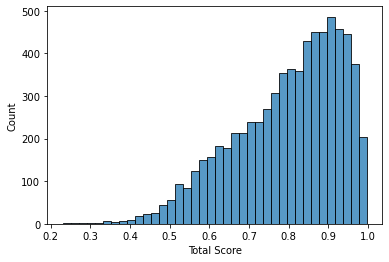

In [43]:
sns.histplot(merged_groups.groupby('Orthogroup').mean().dropna()['Total Score'])

In [44]:
all_fc_scores = pd.DataFrame(index = egad_scores.index)
all_fc_scores

""
10009at3193
10051at3193
10092at3193
10147at3193
1018at3193
...
9842at3193
9877at3193
9919at3193
9942at3193


In [45]:
list_of_species_to_run_on = species_with_nets_to_run['Common Name'].to_list()


In [46]:
plant_combinations = list(itertools.permutations(list_of_species_to_run_on,2))

In [49]:
Name_resolver.species_name_resolver('sorghum','taxa_id')

4558

In [50]:
for species in list_of_species_to_run_on:
    print(species)
    combos_that_start_with_species = []


    for combo in plant_combinations:
        if combo[0] == species:
            combos_that_start_with_species.append(combo)



    species_specific_df = pd.DataFrame(index = egad_scores.index)
    outer_loop_species_taxa = Name_resolver.species_name_resolver(species,'taxa_id' )
    current_og_groups = og_groups.loc[og_groups['Species']==outer_loop_species_taxa]
    current_og_groups = current_og_groups.loc[current_og_groups['Orthogroup'].isin(egad_scores.index)]
   
    



    for current_combination in combos_that_start_with_species:
        current_table =get_fc_table(current_combination[0],current_combination[1])
        current_species_taxa = species_with_nets_to_run.loc[species_with_nets_to_run['Common Name'] == current_combination[0]]['Taxa ID'].item()
        merged_groups = current_og_groups.merge(how = 'left', left_on = "Symbol",right_on=current_combination[0], right = current_table[[current_combination[0],current_combination[1],'Total Score']] )
        mean_fc = merged_groups[['Orthogroup','Total Score']].groupby('Orthogroup').mean()
        species_specific_df = species_specific_df.merge(right = mean_fc,left_index=True,right_index=True, how = 'left')
        species_specific_df = species_specific_df.rename(columns={'Total Score':current_combination[1]})

    mean_across_species = species_specific_df.mean(axis = 1)
    all_fc_scores[species] = mean_across_species



rice_jp
apple
sorghum
maize
grape
mustard
soybean
medicago
tobacco
potato
tomato
arabidopsis
peanut
cucumber
brome


In [51]:
all_fc_scores

,rice_jp,apple,sorghum,maize,grape,mustard,soybean,medicago,tobacco,potato,tomato,arabidopsis,peanut,cucumber,brome
10009at3193,NaN,NaN,NaN,NaN,0.583997,NaN,NaN,0.517413,0.591679,0.513038,0.601148,0.589861,0.522271,NaN,NaN
10051at3193,NaN,NaN,0.566855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10092at3193,NaN,0.629606,0.808453,NaN,0.856542,0.727202,NaN,0.804439,0.737269,0.814557,0.845043,NaN,0.720152,0.775020,0.814547
10147at3193,NaN,0.819904,0.892485,NaN,0.845054,0.842981,NaN,0.876004,0.818033,0.897223,0.879835,NaN,0.729054,0.886209,0.886483
1018at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9877at3193,NaN,0.824485,0.885000,NaN,0.859097,0.804136,NaN,0.848538,0.772800,0.820767,0.799037,NaN,0.755280,0.838709,0.864777
9919at3193,NaN,0.961564,0.981407,NaN,0.976749,0.972088,NaN,0.983809,0.938105,0.982975,0.981598,NaN,0.848020,0.975691,0.964126
9942at3193,NaN,0.710512,0.794803,NaN,0.696318,0.818575,NaN,0.861269,0.760829,0.820138,0.738549,NaN,0.771815,0.850558,0.780488


In [52]:
egad_scores = egad_scores.replace(.5,np.nan)
egad_scores

,rice_jp AUC,rice_jp P_Value,apple AUC,apple P_Value,sorghum AUC,sorghum P_Value,maize AUC,maize P_Value,grape AUC,grape P_Value,...,tomato AUC,tomato P_Value,arabidopsis AUC,arabidopsis P_Value,peanut AUC,peanut P_Value,cucumber AUC,cucumber P_Value,brome AUC,brome P_Value
10009at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.401113,0.346227,NaN,NaN,0.989036,0.001673,NaN,NaN,NaN,NaN
10051at3193,NaN,NaN,NaN,NaN,0.824484,0.097168,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10092at3193,NaN,NaN,0.972724,0.029325,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10147at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.966198,0.031113,0.573785,0.123953,NaN,NaN,NaN,NaN
1018at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9877at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.745225,0.163335,0.914328,0.048738,0.952515,0.001031,NaN,NaN,NaN,NaN
9919at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.946469,0.037065,NaN,NaN,NaN,NaN
9942at3193,0.643618,0.192945,0.469626,0.436319,NaN,NaN,0.79142,0.082094,0.75488,0.002001,...,NaN,NaN,0.400784,0.345742,0.270053,0.178851,NaN,NaN,0.327220,0.14996


In [53]:
egad_scores = egad_scores.filter(regex = 'AUC')

In [54]:
15-egad_scores.isna().sum(axis = 1)

10009at3193    4
10051at3193    1
10092at3193    2
10147at3193    5
1018at3193     0
              ..
9842at3193     0
9877at3193     7
9919at3193     2
9942at3193     9
9959at3193     2
Length: 15495, dtype: int64

In [55]:
all_fc_scores

,rice_jp,apple,sorghum,maize,grape,mustard,soybean,medicago,tobacco,potato,tomato,arabidopsis,peanut,cucumber,brome
10009at3193,NaN,NaN,NaN,NaN,0.583997,NaN,NaN,0.517413,0.591679,0.513038,0.601148,0.589861,0.522271,NaN,NaN
10051at3193,NaN,NaN,0.566855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10092at3193,NaN,0.629606,0.808453,NaN,0.856542,0.727202,NaN,0.804439,0.737269,0.814557,0.845043,NaN,0.720152,0.775020,0.814547
10147at3193,NaN,0.819904,0.892485,NaN,0.845054,0.842981,NaN,0.876004,0.818033,0.897223,0.879835,NaN,0.729054,0.886209,0.886483
1018at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842at3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9877at3193,NaN,0.824485,0.885000,NaN,0.859097,0.804136,NaN,0.848538,0.772800,0.820767,0.799037,NaN,0.755280,0.838709,0.864777
9919at3193,NaN,0.961564,0.981407,NaN,0.976749,0.972088,NaN,0.983809,0.938105,0.982975,0.981598,NaN,0.848020,0.975691,0.964126
9942at3193,NaN,0.710512,0.794803,NaN,0.696318,0.818575,NaN,0.861269,0.760829,0.820138,0.738549,NaN,0.771815,0.850558,0.780488


In [56]:
final_plotting_frame = pd.DataFrame(index = egad_scores.index)
final_plotting_frame['EGAD Species Present'] = 15-egad_scores.isna().sum(axis = 1)
final_plotting_frame['FC Species Present'] = 15 - all_fc_scores.isna().sum(axis =1)
final_plotting_frame['AVG FC'] = all_fc_scores.mean(axis =1)
final_plotting_frame['AVG EGAD'] = egad_scores.mean(axis = 1)
final_plotting_frame

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10009at3193,4,7,0.559915,0.829159
10051at3193,1,1,0.566855,0.824484
10092at3193,2,11,0.775712,0.910269
10147at3193,5,11,0.852115,0.709248
1018at3193,0,0,NaN,NaN
...,...,...,...,...
9842at3193,0,0,NaN,NaN
9877at3193,7,11,0.824784,0.852708
9919at3193,2,11,0.960557,0.913266
9942at3193,9,11,0.782169,0.543235


In [57]:
trimmed_plotting_frame = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>2) & (final_plotting_frame['FC Species Present']>2)]
trimmed_plotting_frame

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10009at3193,4,7,0.559915,0.829159
10147at3193,5,11,0.852115,0.709248
10228at3193,3,11,0.906947,0.601839
10525at3193,4,12,0.702035,0.637056
10648at3193,7,11,0.919942,0.534928
...,...,...,...,...
9609at3193,6,11,0.555317,0.838965
9789at3193,12,11,0.762138,0.764906
9828at3193,4,12,0.810020,0.913483
9877at3193,7,11,0.824784,0.852708


(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

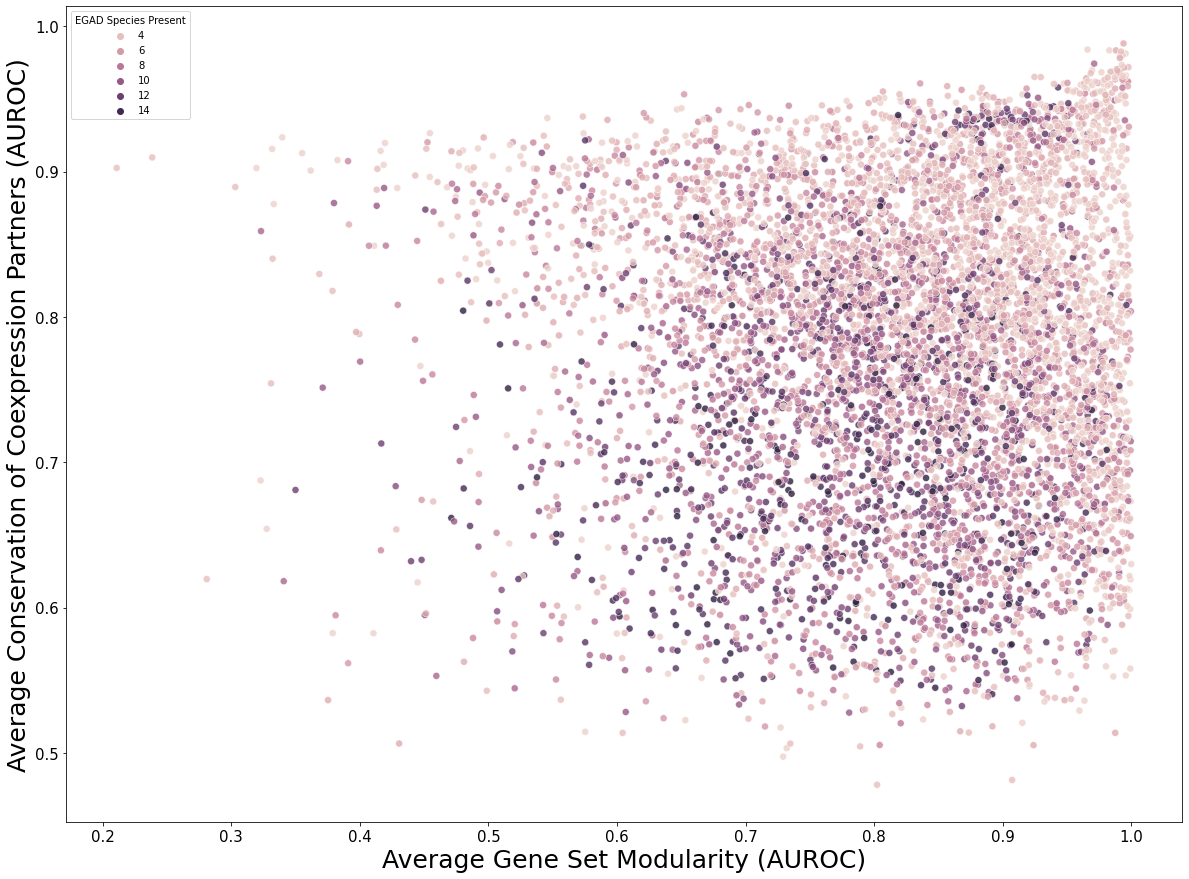

In [58]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = trimmed_plotting_frame,y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'dimgray', alpha = .8, hue = 'EGAD Species Present')

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

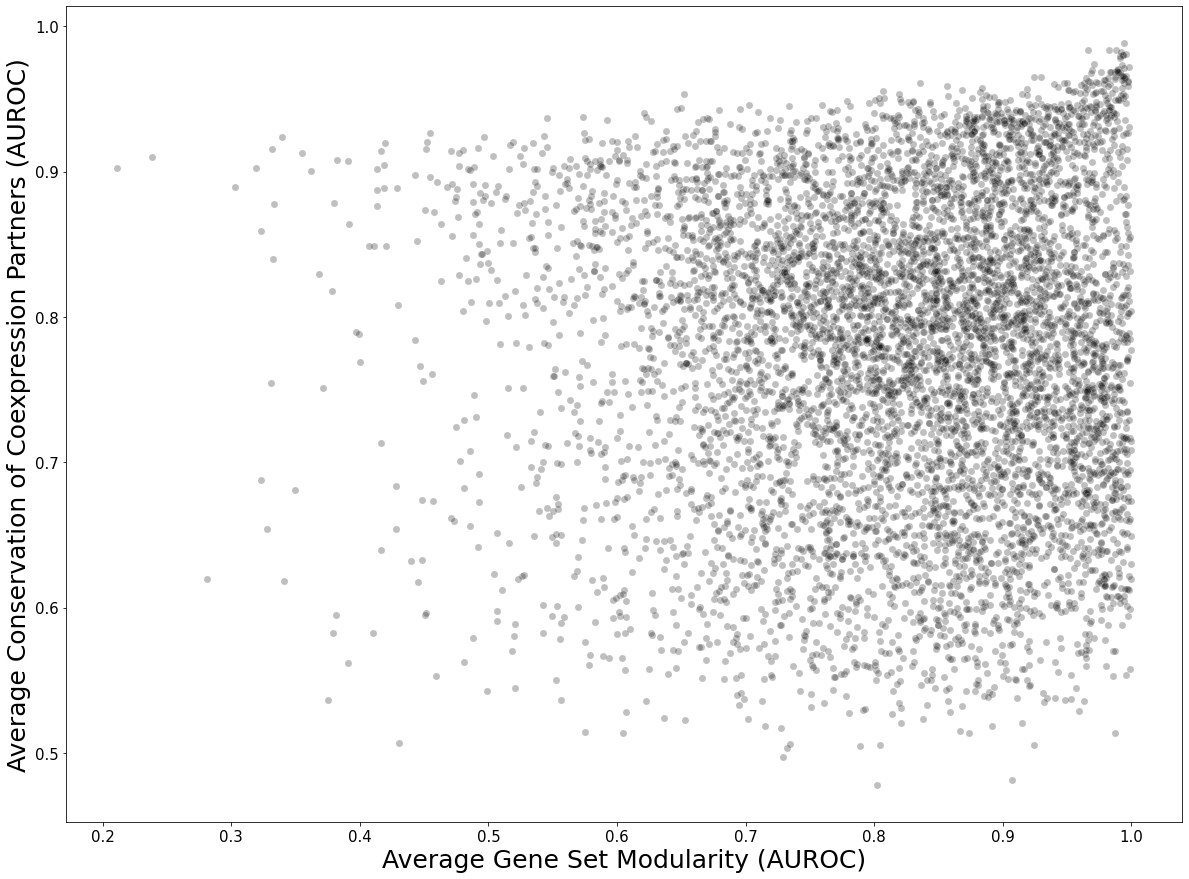

In [59]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = trimmed_plotting_frame,y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25, )

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

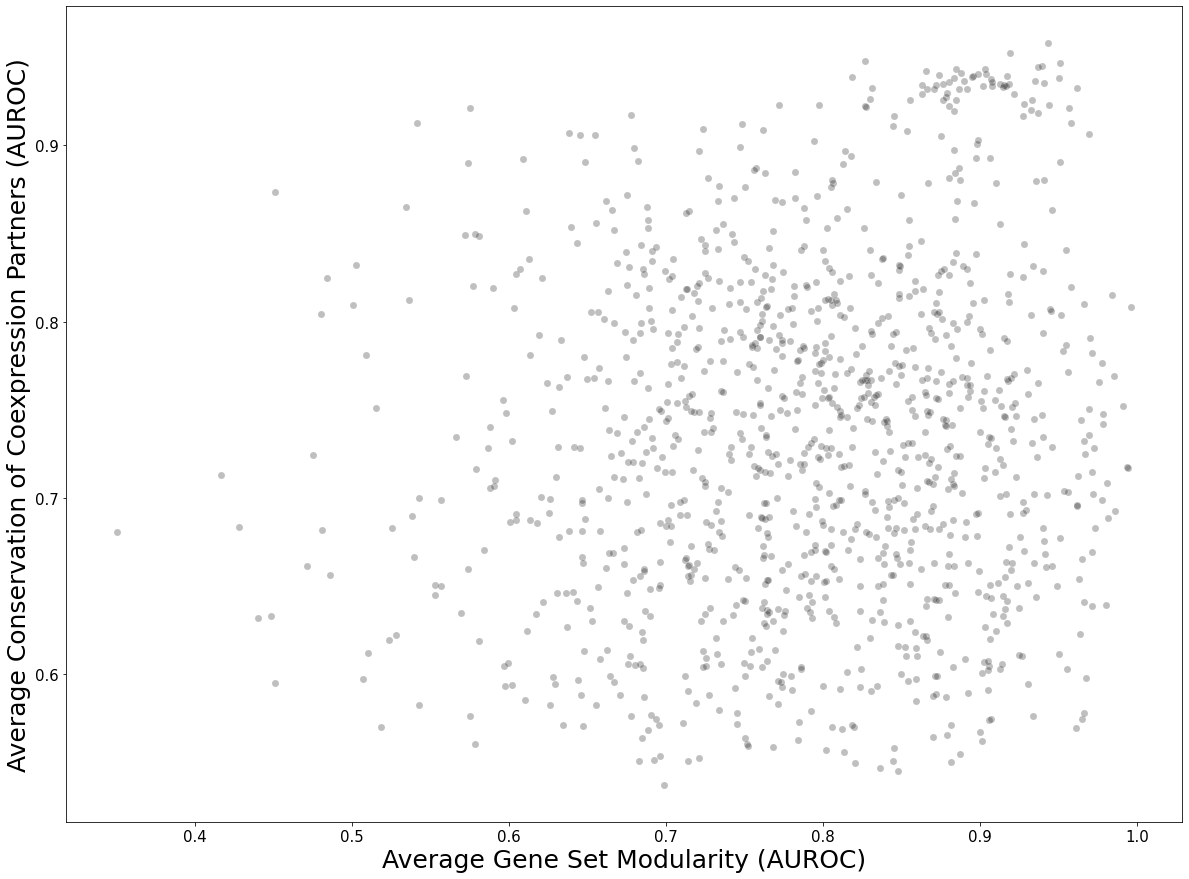

In [62]:
fig, ax = plt.subplots(figsize = (20,15))
sns.scatterplot(data = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>10) & (final_plotting_frame['FC Species Present']>10)],y = 'AVG FC',x = 'AVG EGAD',s = 50,color = 'black', alpha = .25,)

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [64]:
#final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>10) & (final_plotting_frame['FC Species Present']>10)].to_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/gene_based_over_10_species.csv')

In [67]:
final_plotting_frame.to_csv('/data/passala/Generated_Tables/Comparing_all_orthogorups_across_plants/gene_based_all_species.csv')

In [65]:
final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>10) & (final_plotting_frame['FC Species Present']>10)]

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD
10772at3193,13,11,0.858861,0.808797
10950at3193,15,11,0.726940,0.842641
109843at3193,11,12,0.923573,0.927875
110087at3193,11,12,0.746114,0.810739
110263at3193,13,12,0.728852,0.631345
...,...,...,...,...
923at3193,14,11,0.771205,0.815407
9450at3193,11,11,0.764234,0.893543
9592at3193,14,11,0.705468,0.735142
9601at3193,14,12,0.780244,0.674710


In [ ]:
modded_

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

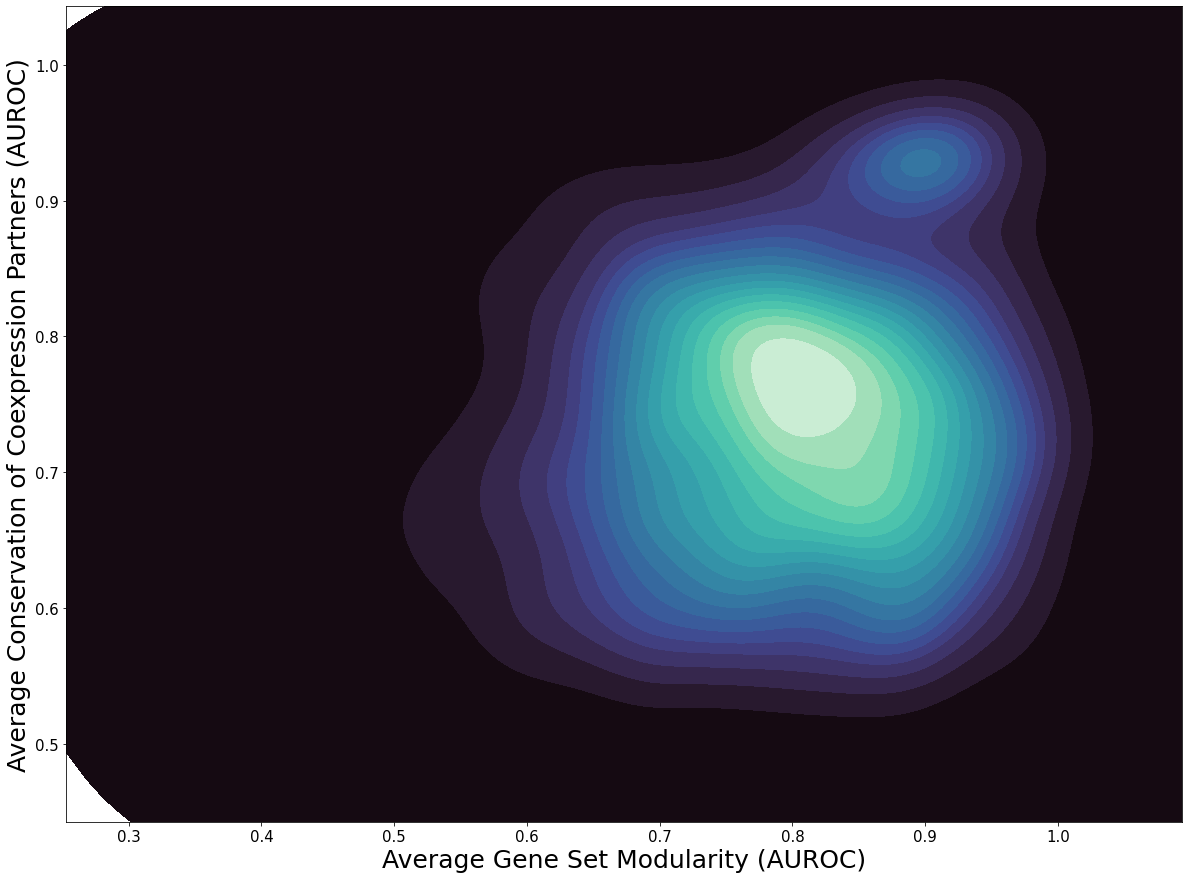

In [68]:
fig, ax = plt.subplots(figsize = (20,15))
sns.kdeplot(data = final_plotting_frame.loc[(final_plotting_frame['EGAD Species Present']>9) & (final_plotting_frame['FC Species Present']>9)],y = 'AVG FC',x = 'AVG EGAD',fill=True, thresh=0, levels=20, cmap="mako")

plt.ylabel("Average Conservation of Coexpression Partners (AUROC)", fontsize = 25)
plt.xlabel("Average Gene Set Modularity (AUROC)", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/transparent_allterms_figure_low_res.png',transparent=True,bbox_inches="tight", dpi = 800)

In [ ]:
current_table

In [ ]:
current_combination

In [ ]:
current_combination[0]

In [ ]:
cur

In [ ]:
current_table.loc[current_table['sorghum'].isin(current_og_groups['Symbol'].to_list())]

In [ ]:
current_og_groups

In [ ]:
current_og_groups.merge(how = 'left', left_on = "Symbol",right_on=current_combination[0], right = current_table[[current_combination[0],current_combination[1],'Total Score']] )

In [ ]:
merged_groups.head(50)

In [ ]:
current_species_taxa

In [ ]:
species_with_nets

In [ ]:
current_table

In [ ]:
all_fc_scores.sum().head(50)

In [ ]:
mean_fc = merged_groups[['Orthogroup','Total Score']].groupby('Orthogroup').mean()
mean_fc


In [ ]:
    species_specific_df = pd.DataFrame(index = egad_scores.index)


In [ ]:
species_specific_df.merge(right = mean_fc,left_index=True,right_index=True, how = 'left')


In [ ]:
file_genes = open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','wb')
pickle.dump(all_group_annotations,file_genes)
file_genes.close()

In [ ]:
all_orthogroups= pickle.load(open('/data/passala/Generated_Tables/Temp_junk/annotated_groups_with_numbers.p','rb'))


In [ ]:
over_3_groups_annotated = all_group_annotations.loc[all_group_annotations['Species Present']>3]
over_3_groups_annotated

In [ ]:
list_of_species = species_with_nets_to_run['Species'].to_list()
list_of_species

In [ ]:
egad_dataframe = pd.DataFrame(columns = list_of_species, index = over_3_groups_annotated.index,)
egad_dataframe

In [ ]:
for species in tqdm.tqdm(list_of_species):
    current_coconet = CococoNet_reader.read_cococonet(species)
    


In [ ]:
over_3_groups_annotated.

In [ ]:
all_group_annotations

In [ ]:
all_group_annotations

In [ ]:
num_species = len(genes['Species'].unique())
num_species

In [ ]:
genes